### Importing necessary libraries for exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msn
from textwrap import wrap

In [2]:
# Load data

trans_data = pd.read_excel('transaction.xlsx')

In [3]:
trans_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
trans_data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

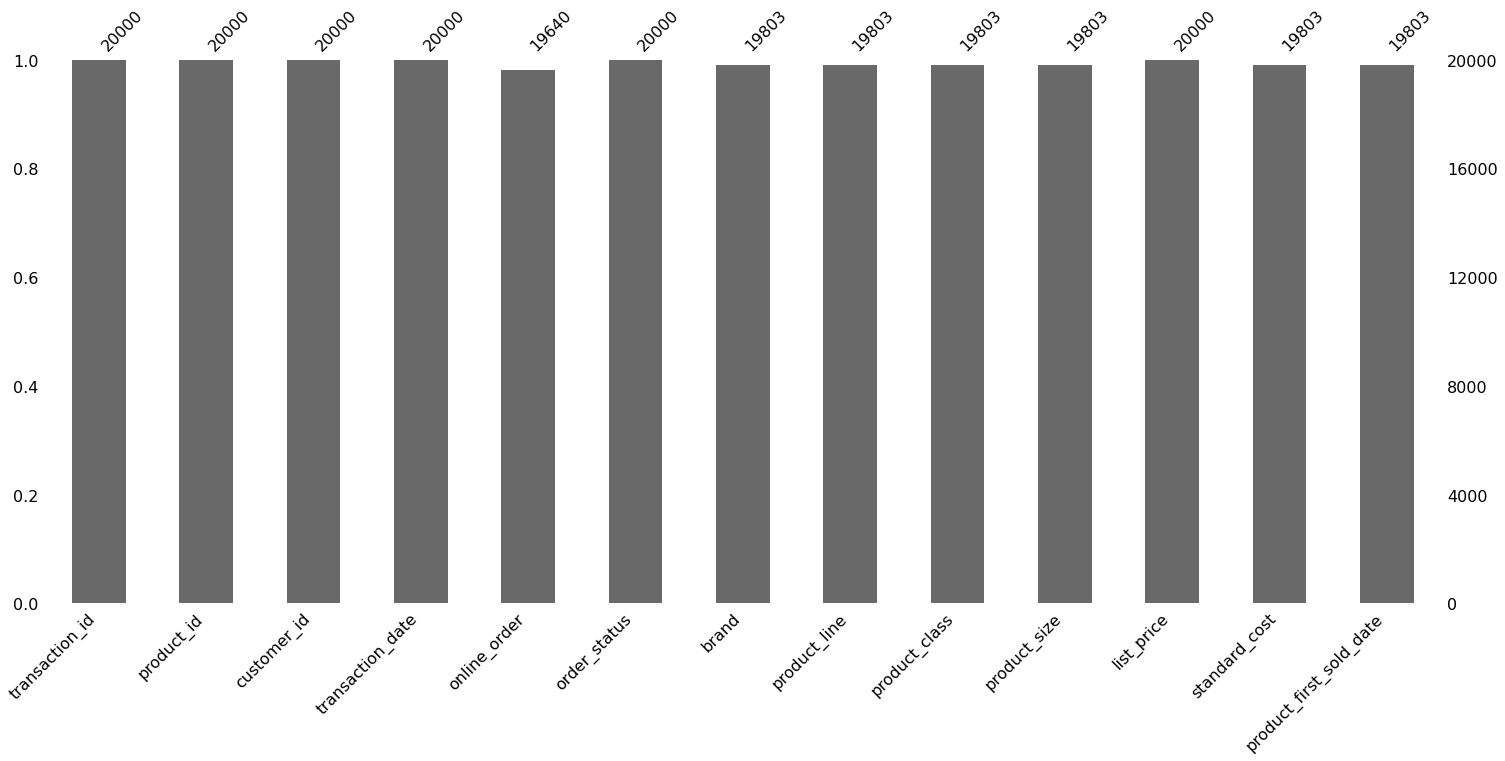

In [5]:
# Visualize the fields with missing data
msn.bar(trans_data)
plt.show()

**Missing data represents less than 1% in the fields they are found from the visual. I considered filling in the missing values but s sensitive column like the product_first_sold_date has missing values, which will be difficult to predict the accurate date. So I will drop all missing values**

In [9]:
trans_data.dropna(inplace = True)

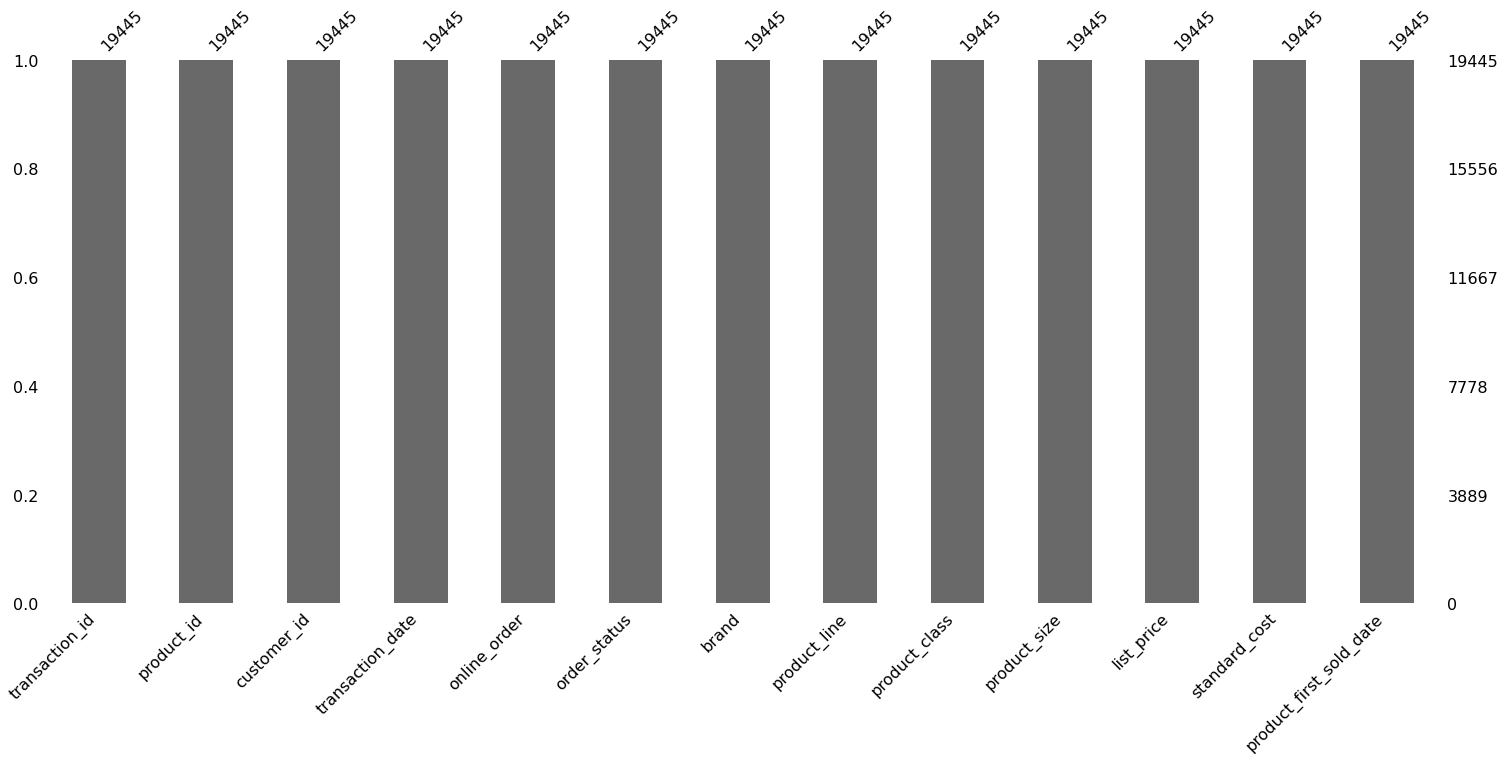

In [10]:
# Visualizing the data after dropping the missing values
msn.bar(trans_data)
plt.show()

In [11]:
trans_data.shape

(19445, 13)

In [12]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [13]:
# A function that will parse the date time base cohort. We get one day of the month
def get_month(date):
    return dt.datetime(date.year, date.month, 1)


# Create a new date column base on month
trans_data['trans_month'] = trans_data['transaction_date'].apply(get_month)

In [14]:
# Grouping by customer_id and select the trans_month value
grouping = trans_data.groupby('customer_id')['trans_month']

In [16]:
#Assigning a minimum trans_month value to the dataset
trans_data['cohort_month'] = grouping.transform('min')

In [17]:
# Let's check out new dataset

trans_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_month,cohort_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


In [18]:
trans_data.shape

(19445, 15)

***Calculating time offset in month as cohort index***
Calculation time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.
First we will create variables that capture the integer value of the years, months and days for transaction and cohort date using the get_date_int() function

In [19]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [21]:
#Getting the integers for date parts from the InvoiceDay column
transaction_year, transaction_month, _ = get_date_int(trans_data, 'trans_month') 

In [ ]:
#Getting the integer for date from the CohortDay column
cohort_year, cohort_month, _ = get_date